In [114]:
!pip install --upgrade openai

In [115]:
!pip install open_clip_torch transformers

In [116]:
!pip install diffusers

In [117]:
!pip install accelerate

# Get Date and Time for Naming Txt

In [118]:
from datetime import datetime

# Get the current date and time
current_datetime = datetime.now()

# Format the date and time as a string
formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")

print(formatted_datetime)


2023-12-02 22:10:15


# Get the Text to Simplify

In [119]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))



Saving disregard2.txt to disregard2 (1).txt
User uploaded file "disregard2 (1).txt" with length 2101 bytes


In [120]:
text_path=f"/content/{filename}"

In [121]:
text_path

'/content/disregard2 (1).txt'

# Get the Image

In [122]:
from google.colab import files

uploaded = files.upload()

# To confirm the file names uploaded
for filename in uploaded.keys():
    print(f"Uploaded file '{filename}' with length {len(uploaded[filename])} bytes.")

Saving image.png to image (1).png
Uploaded file 'image (1).png' with length 694792 bytes.


In [123]:
image_path=f"/content/{filename}"

In [124]:
image_path

'/content/image (1).png'

# Showing the Input alltogether

In [125]:
#display the text from the file text_path

def print_file_content(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        print(content)

# Call the function with your file path
print_file_content(text_path)


Disregarding Kierkegaard’s re-gardening of The Garden of Eden examines how the triumph of cloud-based post-industrial economic models viewed through the filthy lens of the #anthroposcene offer a vital opportunity to disregard Kierkegaard’s Concept of Anxiety, which regards the Garden of Eden as a safe-space, whose inhabitants are guarded from the anxiety of the outer world. Kierkegaard’s conception of the Garden of Eden finds it’s foil in the privately owned public data garden that constitutes the corporatization of social media environment, where the flora of anxiety are germinated in the soil of networked consciousness, blossoming in the world as armour-plated sports utility vehicles, bovine collagen lip fillers, laser-guided weaponry, and hyper-reflective paparazzi-proof clothing lines. The spectacle of violence and vanity cross-pollinate in a relentless stream of images pouring out of news feeds into the minds of beauty-bloggers, and jihadis alike. The well-regarded French academic

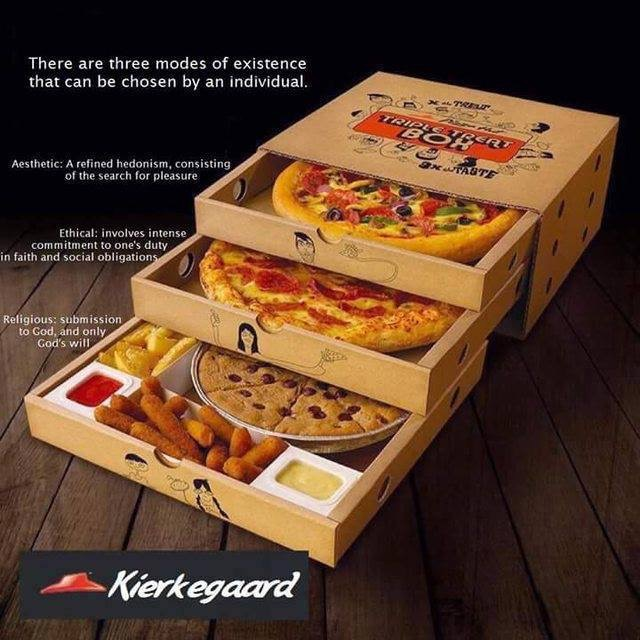

In [126]:
#show image
from IPython.display import Image
Image(image_path, width=500)

# Simplify the Text

In [127]:
from transformers import pipeline

# Open and read the article
with open(text_path, "r", encoding="utf8") as f:
    to_simplify = f.read()

# Initialize the HuggingFace text simplification pipeline
simplifier = pipeline("text2text-generation", model="mrm8488/t5-small-finetuned-text-simplification")

# Simplify the text
simplified = simplifier(to_simplify, min_length=20, max_length=50)




Token indices sequence length is longer than the specified maximum sequence length for this model (523 > 512). Running this sequence through the model will result in indexing errors


In [128]:
extracted_text = simplified[0]['generated_text']
print(extracted_text)

The erasure of vicissitudes of gardening is a way to perpetuate the sense of disregard with which millennial audiences regard gardening .


# Get Caption for Image

In [129]:
#loading the model
import open_clip
import torch

model, _, transform = open_clip.create_model_and_transforms(
  model_name="coca_ViT-L-14",
  pretrained="mscoco_finetuned_laion2B-s13B-b90k"
)

In [130]:
#generate the caption for the picture
from PIL import Image
im = Image.open(image_path).convert("RGB")
im = transform(im).unsqueeze(0)

with torch.no_grad(), torch.cuda.amp.autocast():
  generated = model.generate(im)

new_caption = open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", "")[:-2]

In [131]:
#print the caption for the picture
print(new_caption)

a box of pizza is shown with a variety of toppings 


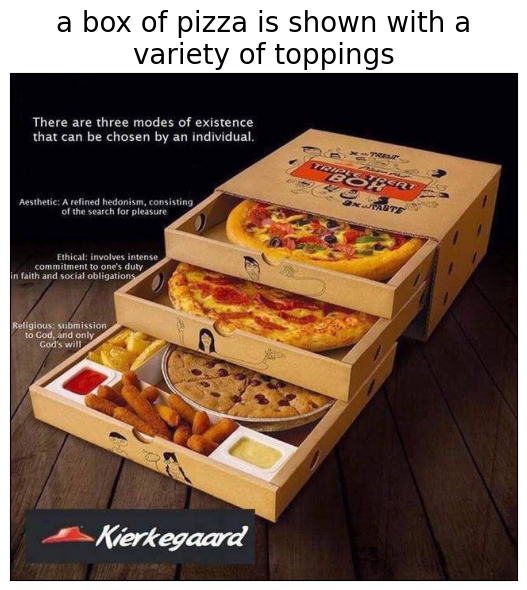

In [132]:
import matplotlib.pyplot as plt
import textwrap
from PIL import Image

# Plotting the image with the new caption
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
image = Image.open(file_path_colab).convert("RGB")
plt.imshow(image)
description_wrapped = "\n".join(textwrap.wrap(new_caption, width=30))
plt.title(description_wrapped, size=20, y=1)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()


# Get Press Text from OpenAI

here upload api_key txt file

In [133]:
from google.colab import files

uploaded = files.upload()

# To confirm the file names uploaded
for filename in uploaded.keys():
    print(f"Uploaded file '{filename}' with length {len(uploaded[filename])} bytes.")

Saving openai-api-key.txt to openai-api-key (1).txt
Uploaded file 'openai-api-key (1).txt' with length 51 bytes.


In [134]:
api_key_path=f"/content/{filename}"

In [135]:
import openai
import requests

In [136]:
# Load your OpenAI API key from the text file

with open(api_key_path, "r") as f:
  openai_api_key = f.read().strip("\n")  # It's better to use a separate variable for clarity


## Press text from new image caption

In [137]:
#input_for_press_text = f"i have an artwork where {new_caption},  please write a complex press text for an exhibiton in international art english dealing with post-colonialism, identity politics, military industrial complex and queerness through the language of writerts like Ranciere, Deleuze, Trevor Paglen, Hito Steyerl, Slavoy Zizek, Claire Fontane, Michel Foucault, Donna Harraway and Paul Preciado"

In [138]:
#input_for_press_text

In [139]:
from openai import OpenAI
client = OpenAI(api_key=openai_api_key,)

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "I give a short description of an artwork. Please write a complex press text for an exhibiton in international art english dealing with post-colonialism, identity politics, military industrial complex and queerness through the language of writerts like Ranciere, Deleuze, Trevor Paglen, Hito Steyerl, Slavoy Zizek, Claire Fontane, Michel Foucault, Donna Harraway and Paul Preciado. Without any name-dropping. Just output the press text without surrounding or explaining messages with it."},
    {"role": "user", "content": new_caption}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='Press Release:\n\nThrough a mesmerizing assemblage that provokes the analytical potentiality of visual language, the forthcoming exhibition eloquently navigates the manifold terrains of post-colonialism, identity politics, the military industrial complex, and queerness. Untethering from conventional paradigms of artistic representation, this immersive showcase defies the confines of normative discourse, unveiling the complexities of contemporary socio-cultural apparatuses.\n\nIn this enigmatic exploration, a central focal point emerges in the form of a seemingly mundane yet potent symbol: a visually arresting box of pizza adorned with an assortment of tantalizing toppings. This object, steeped in its metaphorical layerings, becomes an ontological conduit for the intricate interplay of power dynamics and sociopolitical forces that permeate our existence.\n\nThrough an evocative juxtaposition of imagery and space, the exhibition dismantles ossified narrativ

In [140]:
# Assuming 'completion' is the variable holding the response from the chat completion API
message_content = completion.choices[0].message.content
print(message_content)


Press Release:

Through a mesmerizing assemblage that provokes the analytical potentiality of visual language, the forthcoming exhibition eloquently navigates the manifold terrains of post-colonialism, identity politics, the military industrial complex, and queerness. Untethering from conventional paradigms of artistic representation, this immersive showcase defies the confines of normative discourse, unveiling the complexities of contemporary socio-cultural apparatuses.

In this enigmatic exploration, a central focal point emerges in the form of a seemingly mundane yet potent symbol: a visually arresting box of pizza adorned with an assortment of tantalizing toppings. This object, steeped in its metaphorical layerings, becomes an ontological conduit for the intricate interplay of power dynamics and sociopolitical forces that permeate our existence.

Through an evocative juxtaposition of imagery and space, the exhibition dismantles ossified narratives, inviting viewers into a contempla

## get press text from summary

In [141]:
from openai import OpenAI
client = OpenAI(api_key=openai_api_key,)

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "I give a short description of an artwork. Please write a complex press text for an exhibiton in international art english dealing with post-colonialism, identity politics, military industrial complex and queerness through the language of writerts like Ranciere, Deleuze, Trevor Paglen, Hito Steyerl, Slavoy Zizek, Claire Fontane, Michel Foucault, Donna Harraway and Paul Preciado. Without doing too many name drops. Just output the press text and not surrounding or explaining messages with it."},
    {"role": "user", "content": extracted_text}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='PRESS RELEASE\n\nFOR IMMEDIATE RELEASE\n\nEmbargoed until [Insert Date]\n\n[Venue Name] Presents: "Re(de)constructing Narratives: Unveiling the Multifaceted Nexus of Post-Colonialism, Identity Politics, Military Industrial Complex, and Queerness"\n\n[City, Date] - [Venue Name] is delighted to announce its forthcoming exhibition, "Re(de)constructing Narratives: Unveiling the Multifaceted Nexus of Post-Colonialism, Identity Politics, Military Industrial Complex, and Queerness." This groundbreaking exhibition, curated by [Curator Name], seeks to challenge dominant paradigms and ignite critical discourse by dissecting the intricate web of power structures in the contemporary world.\n\nDrawing on the philosophical insights of influential thinkers such as Rancière, Deleuze, Trevor Paglen, Hito Steyerl, Slavoj Žižek, Claire Fontane, Michel Foucault, Donna Haraway, and Paul B. Preciado, this exhibition serves as a catalyst for profound examination and deeper unde

In [142]:
# Assuming 'completion' is the variable holding the response from the chat completion API
message_content_summary = completion.choices[0].message.content
print(message_content_summary)


PRESS RELEASE

FOR IMMEDIATE RELEASE

Embargoed until [Insert Date]

[Venue Name] Presents: "Re(de)constructing Narratives: Unveiling the Multifaceted Nexus of Post-Colonialism, Identity Politics, Military Industrial Complex, and Queerness"

[City, Date] - [Venue Name] is delighted to announce its forthcoming exhibition, "Re(de)constructing Narratives: Unveiling the Multifaceted Nexus of Post-Colonialism, Identity Politics, Military Industrial Complex, and Queerness." This groundbreaking exhibition, curated by [Curator Name], seeks to challenge dominant paradigms and ignite critical discourse by dissecting the intricate web of power structures in the contemporary world.

Drawing on the philosophical insights of influential thinkers such as Rancière, Deleuze, Trevor Paglen, Hito Steyerl, Slavoj Žižek, Claire Fontane, Michel Foucault, Donna Haraway, and Paul B. Preciado, this exhibition serves as a catalyst for profound examination and deeper understanding of the complex intersections wh

# Image from Text

In [143]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [144]:
#generate image from new caption
prompt = f"contemporary art of {new_caption}"
image_from_caption = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

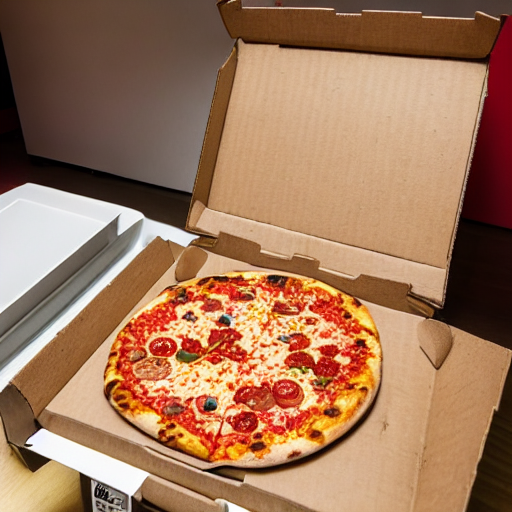

In [145]:
#show image
image_from_caption

In [146]:
#image generated from summary
prompt_summary = f"contemporary art of {extracted_text}"
image_from_summary = pipe(prompt_summary).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

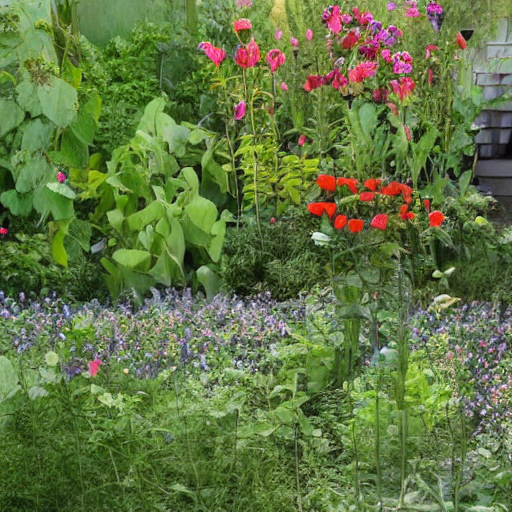

In [147]:
image_from_summary


In [150]:
prompt_press = message_content_summary
image = pipe(prompt_press).images[0]


Token indices sequence length is longer than the specified maximum sequence length for this model (736 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the multifaceted nexus of post - colonialism, identity politics, military industrial complex, and queerness." this groundbreaking exhibition, curated by [ curator name ], seeks to challenge dominant paradigms and ignite critical discourse by dissecting the intricate web of power structures in the contemporary world. drawing on the philosophical insights of influential thinkers such as rancière, deleuze, trevor paglen, hito steyerl, slavoj žižek, claire fontane, michel foucault, donna haraway, and paul b. preciado, this exhibition serves as a catalyst for profound examination and deeper understanding of the complex intersections where post - colonialism, identity politics, the military - industrial complex

  0%|          | 0/50 [00:00<?, ?it/s]

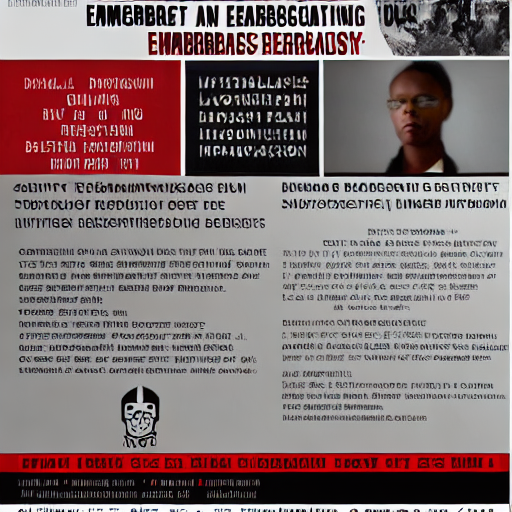

In [151]:
image

In [152]:
image_from_presstext=image

# Generate PDF

In [157]:
!pip install fpdf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.1/187.1 kB 3.8 MB/s eta 0:00:00


In [158]:


from fpdf import FPDF
from PIL import Image
import io

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'My Document', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, 'Page %s' % self.page_no(), 0, 0, 'C')

# Create a PDF object
pdf = PDF()
pdf.add_page()

# Add some text
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt=f"Displaying Images: {message_content_summary}", ln=True, align='C')

# Function to convert PIL image to bytes
def pil_image_to_byte_array(image: Image):
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()
    return img_byte_arr

# Your PIL image objects
#image1 = Image.open("your_image_file.jpg")

# Add your PIL image to the PDF
image_bytes = pil_image_to_byte_array(image_from_presstext)
pdf.mem_image(image_bytes, x=10, y=30, w=100)

# Save the PDF
pdf.output("your_file.pdf")

# Download the file in Colab
from google.colab import files
files.download('your_file.pdf')


AttributeError: ignored